##### Bohdansky's semi-emprical expression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
COPPER_MASS = 63.54 #[AMU]
ARGON_MASS = 39.94 #[AMU]
TUNGSTEN_MASS = 183.84 #[AMU]
COPPER_SB_ENERGY = 3.48 #[eV]
TUNGSTEN_SB_ENERGY = 11.75 #[eV]

In [19]:
def sputter_yield(TARGET_MASS, TARGET_SB_ENERGY, ION_MASS, ION_ENERGY):
    gamma = 4*ION_MASS*TARGET_MASS/(ION_MASS + TARGET_MASS)**2
    if (ION_MASS/TARGET_MASS > 0.3):
        E_th = 8*TARGET_SB_ENERGY*(ION_MASS/TARGET_MASS)**(2/5)
    else:
        E_th = TARGET_SB_ENERGY/(gamma*(1 - gamma))

    return 6.4e-3*TARGET_MASS*gamma**(5/3)*ION_ENERGY**0.25*(1 - E_th/ION_ENERGY)**3.5

ION_ENERGY_RANGE = np.logspace(1,5,100)

TUNGSTEN_yield = list(map(lambda ION_ENERGY : sputter_yield(TUNGSTEN_MASS, TUNGSTEN_SB_ENERGY, ARGON_MASS, ION_ENERGY), ION_ENERGY_RANGE))
COPPER_yield = list(map(lambda ION_ENERGY : sputter_yield(COPPER_MASS, COPPER_SB_ENERGY, ARGON_MASS, ION_ENERGY), ION_ENERGY_RANGE))
    

C:\Users\GUNU\anaconda3\envs\py_36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


(10, 151285.73508376017)

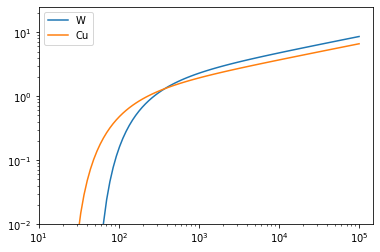

In [20]:
plt.plot(ION_ENERGY_RANGE, TUNGSTEN_yield, ION_ENERGY_RANGE , COPPER_yield)
plt.xscale('log')
plt.yscale('log')
plt.legend(['W','Cu'])
plt.ylim(0.01,)
plt.xlim(10,)